#### -->Install libraries is needed

In [ ]:
!pip install pandas
!pip install sklearn
!pip install gensim

# 1. Bag-of-words (BoW) Model 
The following models a text document using bag-of-words. Here are two simple text documents:

## 1.1 A  unigram model

In [76]:
import pandas as pd
import numpy as np
import sklearn
CORPUS1 = ['John likes to watch movies. Mary likes movies too',
          'Mary also likes to watch football games']
### BOG model
from sklearn.feature_extraction.text import CountVectorizer
def bow_generator1(corpus, ngram_range=(1,1)):# a unigram model
    vectorizer = CountVectorizer(min_df=1, ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features
 
 
# build bow vectorizer and get features
bow_vectorizer1, bow_features1 = bow_generator1(CORPUS1)


### 1.1.1 Based on these two text documents, a list is constructed as follows for each document:

In [77]:
feature_names1 = bow_vectorizer1.get_feature_names()
print (feature_names1)
print ('Number of features:',len(feature_names))

['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch']
Number of features: 10


### 1.1.2  Construct the following two lists to record the term frequencies of all the distinct words (i.e., BoW1 & BoW2)

In [78]:
features1 = (bow_features1.todense())
print (features1)

[[0 0 0 1 2 1 2 1 1 1]
 [1 1 1 0 1 1 0 1 0 1]]


### 1.1.4 Create a data frame from the vectors:

In [74]:
df_train1 = pd.DataFrame(data=features1, columns=feature_names1)
df_train1.head()

,also,football,games,john,likes,mary,movies,to,too,watch
0,0,0,0,1,2,1,2,1,1,1
1,1,1,1,0,1,1,0,1,0,1


## 1.2 n-gram 

In [67]:
CORPUS2 = [
'the green car is fast',
'The blue car has low mileage',
'Your car has high mileage',
'I buy green shirt because it fits my blue eyes'
]

## here we define n=2
def bow_generator2(corpus, ngram_range=(1,2)):
    vectorizer = CountVectorizer(min_df=1, ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features
 
# build bow vectorizer and get features
bow_vectorizer2, bow_features2 = bow_generator2(CORPUS2)

### 1.2.1 Based on these two text documents, a list is constructed as follows for each document:

In [68]:
# print the feature names
feature_names2 = bow_vectorizer2.get_feature_names()
print (feature_names2)

['because', 'because it', 'blue', 'blue car', 'blue eyes', 'buy', 'buy green', 'car', 'car has', 'car is', 'eyes', 'fast', 'fits', 'fits my', 'green', 'green car', 'green shirt', 'has', 'has high', 'has low', 'high', 'high mileage', 'is', 'is fast', 'it', 'it fits', 'low', 'low mileage', 'mileage', 'my', 'my blue', 'shirt', 'shirt because', 'the', 'the blue', 'the green', 'your', 'your car']


### 1.1.2  Construct the following lists to record the term frequencies of all the distinct words 

In [69]:
features2 = (bow_features2.todense())
print (features2)

[[0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1
  0 0]
 [0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0
  0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  1 1]
 [1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0
  0 0]]


### 1.2.3  Features for new document

In [70]:
# extract features from new document using built vectorizer
new_doc = ['I want to buy a car']
new_doc_features = bow_vectorizer2.transform(new_doc)
new_doc_features = new_doc_features.todense()
print(new_doc_features)

[[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]]


### 1.2.4 Create a data frame from the vectors:

In [75]:
df_train2 = pd.DataFrame(data=features2, columns=feature_names2)
df_train2.head()

,because,because it,blue,blue car,blue eyes,buy,buy green,car,car has,car is,...,mileage,my,my blue,shirt,shirt because,the,the blue,the green,your,your car
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,1,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,1
3,1,1,1,0,1,1,1,0,0,0,...,0,1,1,1,1,0,0,0,0,0


# 2. Term Frequency–Inverse Document Frequency (TF-IDF) Model
It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. <a href="https://en.wikipedia.org/wiki/Tf–idf"> Find more information using this wikipedia link</a>

In [100]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(norm='l2',smooth_idf=True, use_idf=True) #smoothing gives sme weights to terms with zero idf not to ignore them.
tfidf_matrix = transformer.fit_transform(bow_features2)
features3 = np.round(tfidf_matrix.todense(), 2)
 
df_tfidf = pd.DataFrame(data=features3, columns=feature_names2)
df_tfidf.head()

,because,because it,blue,blue car,blue eyes,buy,buy green,car,car has,car is,...,mileage,my,my blue,shirt,shirt because,the,the blue,the green,your,your car
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.36,...,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.36,0.00,0.00
1,0.00,0.00,0.27,0.34,0.00,0.00,0.00,0.22,0.27,0.00,...,0.27,0.00,0.00,0.00,0.00,0.27,0.34,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.29,0.00,...,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.37
3,0.25,0.25,0.20,0.00,0.25,0.25,0.25,0.00,0.00,0.00,...,0.00,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.00


### 2.1 Features for new document

In [103]:
# tfidf features for new_doc
tfidf_matrix = transformer.fit_transform(new_doc_features)
features_new = np.round(tfidf_matrix.todense(), 2)
 
df_tfidf_new = pd.DataFrame(data=features_new, columns=feature_names2)


In [107]:
df_tfidf.append(df_tfidf_new, ignore_index=True)


,because,because it,blue,blue car,blue eyes,buy,buy green,car,car has,car is,...,mileage,my,my blue,shirt,shirt because,the,the blue,the green,your,your car
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.36,...,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.36,0.00,0.00
1,0.00,0.00,0.27,0.34,0.00,0.00,0.00,0.22,0.27,0.00,...,0.27,0.00,0.00,0.00,0.00,0.27,0.34,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.29,0.00,...,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.37
3,0.25,0.25,0.20,0.00,0.25,0.25,0.25,0.00,0.00,0.00,...,0.00,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.71,0.00,0.71,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# 3.Word2Vec 
(a short demo on a small size training data)

### -->The training corpus

In [16]:
CORPUS3 = ['the green car is fast',
 'The blue car has low mileage',
 'Your car has high mileage',
 'I buy green shirt because it fits my blue eyes']


In [123]:
#!pip install nltk

#!pip install gensim

### 3.1 Tokenize the input text

In [4]:
import nltk
# tokenize corpora
TOKENIZED_CORPUS = [nltk.word_tokenize(sentence) for sentence in CORPUS3]
#new_doc = ['Your car has high mileage']
#tokenized_new_doc = [nltk.word_tokenize(sentence) for sentence in new_doc]
#print(tokenized_new_doc)

In [5]:
### Check tokenize text
TOKENIZED_CORPUS

[['the', 'green', 'car', 'is', 'fast'],
 ['The', 'blue', 'car', 'has', 'low', 'mileage'],
 ['Your', 'car', 'has', 'high', 'mileage'],
 ['I', 'buy', 'green', 'shirt', 'because', 'it', 'fits', 'my', 'blue', 'eyes']]

### 3.3 Dictionary of words in the corpus

In [6]:
from gensim import corpora
dictionary = corpora.Dictionary(TOKENIZED_CORPUS)
print(dictionary.token2id)

{'car': 0, 'fast': 1, 'green': 2, 'is': 3, 'the': 4, 'The': 5, 'blue': 6, 'has': 7, 'low': 8, 'mileage': 9, 'Your': 10, 'high': 11, 'I': 12, 'because': 13, 'buy': 14, 'eyes': 15, 'fits': 16, 'it': 17, 'my': 18, 'shirt': 19}


### 3.4 Use gensim library to implement Word2Vec

In [7]:
import gensim
# build the word2vec model on our training corpus
model = gensim.models.Word2Vec(TOKENIZED_CORPUS, size=5, window=2, min_count=1)# size= 5 is dimension of one vector


### 3.5 Vector representation for words (present in corpus dictionary)

In [8]:
print('representation of word \'car\'',model.wv['car'])
print('representation of word \'blue\'',model.wv['blue'])

representation of word 'car' [-0.04772395  0.00149458  0.04262592  0.01955218 -0.08095662]
representation of word 'blue' [ 0.02152684  0.00757276 -0.018361    0.01890738  0.06451004]


### 3.6 Plot word wectors using PCA

/Applications/anaconda3/envs/Practice_ML/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


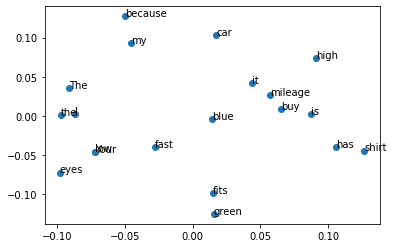

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# 4. Doc2vec 
(for document embedding)

### -->The training corpus

In [171]:
from gensim.test.utils import common_texts
print(common_texts)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


## 4.1 Dictionary of words in the corpus

In [157]:
from gensim import corpora
dictionary = corpora.Dictionary(common_texts)# we assigned a unique integer id to all words appearing in the corpus with the gensim Dictionary class.
print(dictionary.token2id) # the mapping between words and their ids

{'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 6, 'user': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}


#### Each word has an id and each document has words 

In [167]:
corpus = [dictionary.doc2bow(text) for text in common_texts] # each word has an Id and each document has words
print(corpus)

[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


#### Document id is tagged as this list (corpus) index

In [168]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
print(documents)

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]), TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1]), TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=[2]), TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]), TaggedDocument(words=['user', 'response', 'time'], tags=[4]), TaggedDocument(words=['trees'], tags=[5]), TaggedDocument(words=['graph', 'trees'], tags=[6]), TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]), TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])]


## 4.2 Build a model using gensim library function (Doc2Vec)

In [172]:
#  building a model
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, dm =1)


## 4.3 Find vector representation for a document

In [ ]:
# To find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs[0])

## 4.4 Find similarity of docs 

In [175]:
# to find most similar doc using tags
similar_doc = model.docvecs.most_similar(0)
print(similar_doc) # the most similar documents to the first document


[(2, 0.5867767333984375), (3, 0.4596380889415741), (5, 0.24536845088005066), (6, 0.011839973740279675), (7, -0.3207763135433197), (1, -0.5250759720802307), (8, -0.5952994227409363), (4, -0.6555087566375732)]


## 4.5 Use same model to infer vector to a newly added document

In [176]:
#Infer vector for a new document:
new_vector = model.infer_vector(["system", "response"])
print(new_vector)

[-0.08793537  0.05430341  0.01173438  0.08660295 -0.07852478]
